In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitute combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-55.24502194669823, 35.111166185445484),
 (-9.688189836610576, -45.127271585787526),
 (-66.35792135831177, -3.70718911860817),
 (70.06732027412173, -156.32010701663302),
 (-81.9638081068131, -159.18639130264182),
 (54.33252110637898, 139.91900572757805),
 (34.77243566097715, -53.5249118995705),
 (-30.98226305704482, 53.96710470779155),
 (63.65757189119671, -139.87130212045923),
 (-76.2946030262131, 79.90448378070516),
 (-6.002682539444194, -6.076985692855601),
 (85.86989794793453, -15.871738852710962),
 (58.12569822289899, 178.6825599526211),
 (-73.2860678620976, -59.304394498885415),
 (64.14274195899364, -58.24163286031404),
 (65.78967096902124, -90.44777327400536),
 (-13.251875755894858, 52.05705885445042),
 (4.2665218862535, 113.81419321726156),
 (-44.55966969076605, 83.08525841258728),
 (3.3202525161579075, -179.2408257545993),
 (54.09599617143107, 172.33759278102843),
 (-72.1893669834726, 101.18947054814714),
 (-5.869778117284781, -28.439264363199868),
 (71.75643310262404, 90.32

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [6]:
cities

['port alfred',
 'gilbues',
 'cape town',
 'barrow',
 'mataura',
 'mnogovershinnyy',
 'saint george',
 'taolanaro',
 'haines junction',
 'busselton',
 'georgetown',
 'illoqqortoormiut',
 'beringovskiy',
 'ushuaia',
 'sisimiut',
 'thompson',
 'sambava',
 'miri',
 'vaitupu',
 'nikolskoye',
 'albany',
 'cabedelo',
 'talnakh',
 'fevralsk',
 'kapaa',
 'sao gabriel da cachoeira',
 'songjianghe',
 'hermanus',
 'kodiak',
 'norman wells',
 'brandenburg',
 'chokurdakh',
 'wajir',
 'yellowknife',
 'lebu',
 'jamestown',
 'pevek',
 'vaini',
 'lawrence',
 'grand gaube',
 'dataganj',
 'grand river south east',
 'roald',
 'da lat',
 'hilo',
 'kargalinskaya',
 'anisoc',
 'eydhafushi',
 'khambhat',
 'sousa',
 'rikitea',
 'paramonga',
 'belushya guba',
 'tiksi',
 'bredasdorp',
 'freeport',
 'riyadh',
 'punta arenas',
 'puerto ayora',
 'bluff',
 'ostrovnoy',
 'port keats',
 'xudat',
 'amursk',
 'plettenberg bay',
 'tuatapere',
 'jatiroto',
 'beloha',
 'candawaga',
 'mahebourg',
 'kavaratti',
 'bolungarvik

In [7]:
import requests
requests.__version__

'2.22.0'

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime



In [9]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d132834ac529acaa005effd9c0b5236


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginningof the logging.
print("Beginning Data Retrieval      ")
print("------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} |  {city}")
    # Add 1 to the record count.
    record_count += 1
    
        # Run an AP request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})

    # If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

    
# Indicate that Data Loading is complete.
print('----------------------------------')
print('Data Retrieval Complete           ')
print('----------------------------------')

Beginning Data Retrieval      
------------------
Processing Record 1 of Set 1 |  port alfred
Processing Record 2 of Set 1 |  gilbues
Processing Record 3 of Set 1 |  cape town
Processing Record 4 of Set 1 |  barrow
Processing Record 5 of Set 1 |  mataura
Processing Record 6 of Set 1 |  mnogovershinnyy
Processing Record 7 of Set 1 |  saint george
Processing Record 8 of Set 1 |  taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 |  haines junction
Processing Record 10 of Set 1 |  busselton
Processing Record 11 of Set 1 |  georgetown
Processing Record 12 of Set 1 |  illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 |  beringovskiy
Processing Record 14 of Set 1 |  ushuaia
Processing Record 15 of Set 1 |  sisimiut
Processing Record 16 of Set 1 |  thompson
Processing Record 17 of Set 1 |  sambava
Processing Record 18 of Set 1 |  miri
Processing Record 19 of Set 1 |  vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 |  nikolskoye
Proces

Processing Record 34 of Set 4 |  barentsburg
City not found. Skipping...
Processing Record 35 of Set 4 |  itarema
Processing Record 36 of Set 4 |  tianmen
Processing Record 37 of Set 4 |  komsomolskiy
Processing Record 38 of Set 4 |  mar del plata
Processing Record 39 of Set 4 |  malakal
Processing Record 40 of Set 4 |  high level
Processing Record 41 of Set 4 |  vieques
Processing Record 42 of Set 4 |  krasnoye
Processing Record 43 of Set 4 |  east london
Processing Record 44 of Set 4 |  newport
Processing Record 45 of Set 4 |  college
Processing Record 46 of Set 4 |  tasiilaq
Processing Record 47 of Set 4 |  kaitangata
Processing Record 48 of Set 4 |  grandola
Processing Record 49 of Set 4 |  karaul
City not found. Skipping...
Processing Record 50 of Set 4 |  conselheiro lafaiete
Processing Record 1 of Set 5 |  ancud
Processing Record 2 of Set 5 |  inndyr
Processing Record 3 of Set 5 |  tuktoyaktuk
Processing Record 4 of Set 5 |  slyudyanka
Processing Record 5 of Set 5 |  burica
City

Processing Record 22 of Set 8 |  husavik
Processing Record 23 of Set 8 |  agadir
Processing Record 24 of Set 8 |  sao filipe
Processing Record 25 of Set 8 |  coahuayana
Processing Record 26 of Set 8 |  malanje
Processing Record 27 of Set 8 |  dunedin
Processing Record 28 of Set 8 |  atambua
Processing Record 29 of Set 8 |  esfarayen
Processing Record 30 of Set 8 |  saint-francois
Processing Record 31 of Set 8 |  hami
Processing Record 32 of Set 8 |  tubuala
Processing Record 33 of Set 8 |  wewak
Processing Record 34 of Set 8 |  marrakesh
Processing Record 35 of Set 8 |  sogdiondon
City not found. Skipping...
Processing Record 36 of Set 8 |  beyla
Processing Record 37 of Set 8 |  green valley
Processing Record 38 of Set 8 |  vao
Processing Record 39 of Set 8 |  canutama
Processing Record 40 of Set 8 |  ushibuka
Processing Record 41 of Set 8 |  akdepe
Processing Record 42 of Set 8 |  chifeng
Processing Record 43 of Set 8 |  sydney mines
Processing Record 44 of Set 8 |  garowe
Processing 

Processing Record 7 of Set 12 |  zhangye
Processing Record 8 of Set 12 |  sarangani
Processing Record 9 of Set 12 |  auki
Processing Record 10 of Set 12 |  port blair
Processing Record 11 of Set 12 |  tazovskiy
Processing Record 12 of Set 12 |  kharan
Processing Record 13 of Set 12 |  karratha
Processing Record 14 of Set 12 |  sortavala
Processing Record 15 of Set 12 |  claremore
Processing Record 16 of Set 12 |  farafangana
Processing Record 17 of Set 12 |  nanortalik
Processing Record 18 of Set 12 |  formosa do rio preto
Processing Record 19 of Set 12 |  boguchar
Processing Record 20 of Set 12 |  necochea
Processing Record 21 of Set 12 |  anori
Processing Record 22 of Set 12 |  sinnamary
Processing Record 23 of Set 12 |  zabinka
City not found. Skipping...
Processing Record 24 of Set 12 |  stornoway
Processing Record 25 of Set 12 |  taksimo
Processing Record 26 of Set 12 |  xai-xai
Processing Record 27 of Set 12 |  grootfontein
Processing Record 28 of Set 12 |  methoni
Processing Rec

In [11]:
len(city_data)

530

In [12]:
# convert the array for of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,61.12,71,77,19.10,ZA,2020-12-02 00:07:23
1,Gilbues,-9.83,-45.34,77.09,56,62,3.02,BR,2020-12-02 00:07:23
2,Cape Town,-33.93,18.42,61.00,67,40,20.80,ZA,2020-12-02 00:05:59
3,Barrow,71.29,-156.79,5.00,77,90,23.04,US,2020-12-02 00:07:23
4,Mataura,-46.19,168.86,70.95,26,82,14.76,NZ,2020-12-02 00:07:23
5,Mnogovershinnyy,53.94,139.92,1.53,93,87,8.55,RU,2020-12-02 00:05:30
6,Saint George,37.10,-113.58,59.00,15,1,8.05,US,2020-12-02 00:04:06
7,Haines Junction,60.75,-137.51,33.80,96,100,3.36,CA,2020-12-02 00:07:23
8,Busselton,-33.65,115.33,60.01,65,21,5.01,AU,2020-12-02 00:07:23
9,Georgetown,5.41,100.34,77.00,88,20,2.24,MY,2020-12-02 00:05:52


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-12-02 00:07:23,-33.59,26.89,61.12,71,77,19.10
1,Gilbues,BR,2020-12-02 00:07:23,-9.83,-45.34,77.09,56,62,3.02
2,Cape Town,ZA,2020-12-02 00:05:59,-33.93,18.42,61.00,67,40,20.80
3,Barrow,US,2020-12-02 00:07:23,71.29,-156.79,5.00,77,90,23.04
4,Mataura,NZ,2020-12-02 00:07:23,-46.19,168.86,70.95,26,82,14.76
...,...,...,...,...,...,...,...,...,...
525,Taksimo,RU,2020-12-02 00:08:07,56.34,114.88,2.17,85,99,3.15
526,Xai-Xai,MZ,2020-12-02 00:08:07,-25.05,33.64,71.78,89,55,10.42
527,Grootfontein,NA,2020-12-02 00:08:07,-19.57,18.12,72.82,28,36,6.24
528,Methoni,GR,2020-12-02 00:08:07,36.82,21.70,55.99,80,56,2.24


In [14]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']



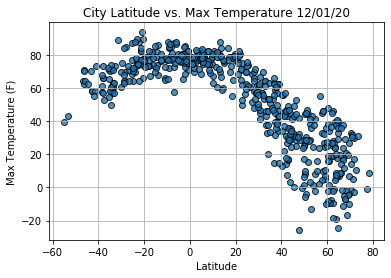

In [16]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

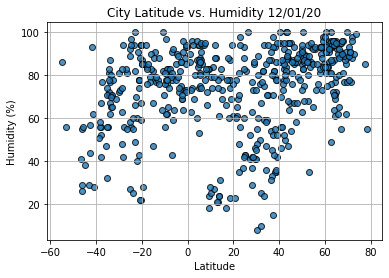

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show plot.
plt.show()

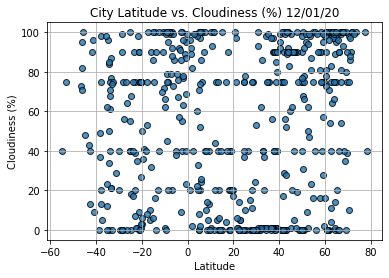

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show plot.
plt.show()

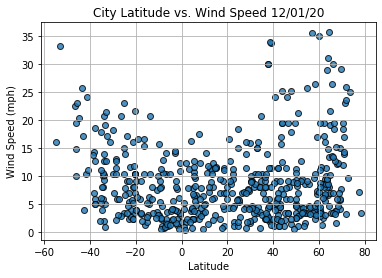

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression no hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    
    

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2020-12-02 00:07:24
Lat                         55.74
Lng                        -97.86
Max Temp                     15.8
Humidity                       92
Cloudiness                     40
Wind Speed                    4.7
Name: 13, dtype: object

In [22]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df

southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-12-02 00:07:23,-33.59,26.89,61.12,71,77,19.10
1,Gilbues,BR,2020-12-02 00:07:23,-9.83,-45.34,77.09,56,62,3.02
2,Cape Town,ZA,2020-12-02 00:05:59,-33.93,18.42,61.00,67,40,20.80
4,Mataura,NZ,2020-12-02 00:07:23,-46.19,168.86,70.95,26,82,14.76
8,Busselton,AU,2020-12-02 00:07:23,-33.65,115.33,60.01,65,21,5.01
...,...,...,...,...,...,...,...,...,...
519,Formosa Do Rio Preto,BR,2020-12-02 00:08:06,-11.05,-45.19,72.77,64,70,2.46
521,Necochea,AR,2020-12-02 00:08:07,-38.55,-58.74,68.00,51,0,13.78
522,Anori,BR,2020-12-02 00:08:07,-3.77,-61.64,79.90,74,57,2.37
526,Xai-Xai,MZ,2020-12-02 00:08:07,-25.05,33.64,71.78,89,55,10.42


-0.8496523274470005


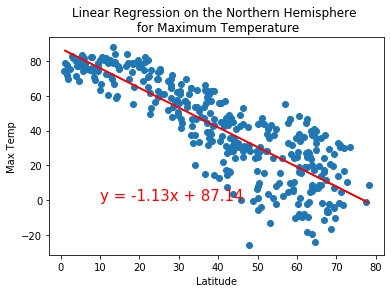

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

0.6219622447750198


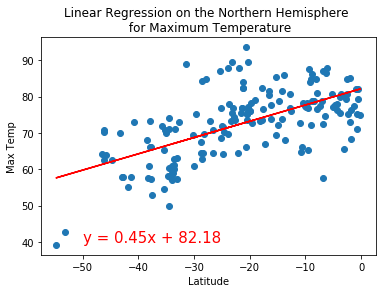

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

0.3132006917174981


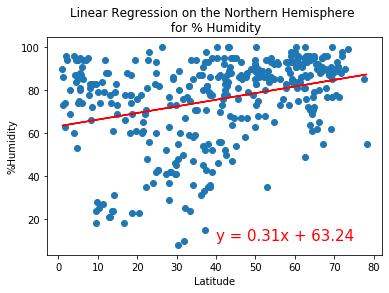

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity', (40,10))

0.42201892710125316


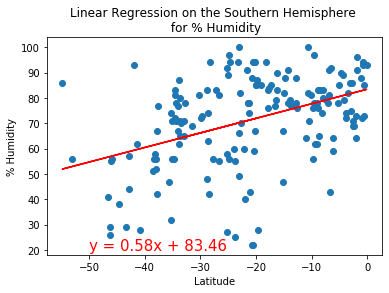

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50, 20))

0.30359113834779067


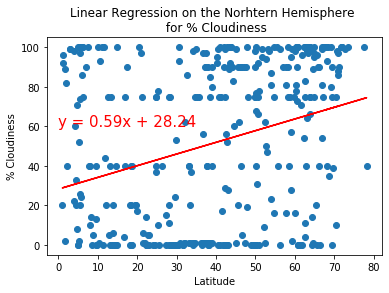

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Norhtern Hemisphere \n for % Cloudiness',
                      '% Cloudiness', (0, 60))

0.2110680939345385


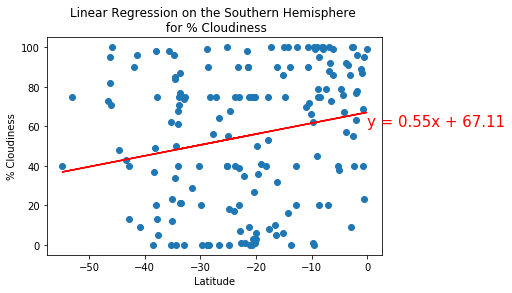

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                      '% Cloudiness', (0, 60))

0.23998693310602753


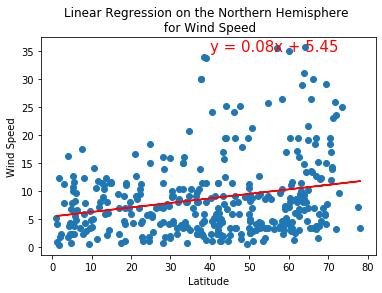

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                      'Wind Speed', (40,35))

-0.49011804382738794


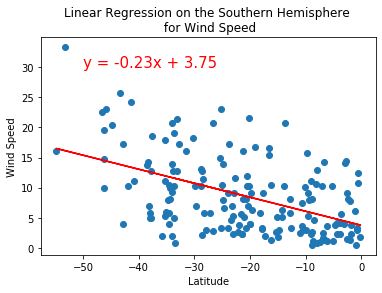

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                      'Wind Speed', (-50,30))